This notebook includes Random Oversampling applied to the training set and visualisations of the oversampling technique (distribution of the resampled data and t-SNE).



# **Import libraries and data**

In [ ]:
!pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import ImbalancedLearningRegression as iblr
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
#Train data set consists of X_train_ig (with 500 features selected by Information Gain in Feature Selection notebook) and y_train
data_train_ig.head()

,seq_TEMP,A,C,E,I,K,L,N,Q,R,...,Normalized van der Waals Volume-T2332,Polarity-T1331,Polarizability-T2332,Charge-T1221,Charge-T1331,Solvent accessibility-T1221,Hydrophobicity_CASG920101-G1D100,Hydrophobicity_FASG890101-G1D100,Normalized van der Waals Volume-G1D100,Charge-G2D100
0,26,0.128743,0.023952,0.059880,0.041916,0.017964,0.083832,0.020958,0.020958,0.083832,...,0.156156,0.213213,0.189189,0.150150,0.048048,0.237237,100.0000,100.000000,100.000000,100.000000
1,30,0.076923,0.008547,0.094017,0.065527,0.068376,0.096866,0.051282,0.025641,0.031339,...,0.180000,0.262857,0.200000,0.165714,0.034286,0.265714,99.7151,98.005698,100.000000,100.000000
2,74,0.043937,0.001757,0.072056,0.108963,0.077329,0.075571,0.047452,0.015817,0.038664,...,0.209507,0.278169,0.228873,0.181338,0.026408,0.288732,100.0000,100.000000,98.242531,100.000000
3,90,0.066055,0.009174,0.102752,0.047706,0.051376,0.095413,0.011009,0.020183,0.106422,...,0.200368,0.257353,0.250000,0.213235,0.053309,0.321691,100.0000,100.000000,99.816514,99.816514
4,29,0.067146,0.007194,0.086331,0.074341,0.050360,0.076739,0.047962,0.069544,0.045564,...,0.197115,0.204327,0.209135,0.149038,0.028846,0.257212,100.0000,100.000000,100.000000,100.000000


In [ ]:
#The training set consists of 2,041 observations
data_train_ig.shape

(2041, 501)

# **Generate synthetic values**

Random Oversampling (RO): duplicates randomly selected rare values and leaves normal domain values unchanged. The amount of oversampling is determined until the rare domain equals in size to the normal domain (relevance threshold is 0.5). The code is borrowed from https://github.com/paobranco/ImbalancedLearningRegression.git 

In [ ]:
##Conduct ro
data_train_ro = iblr.ro(
    
    data = data_train_ig,  ## pandas dataframe
 
    y = 'seq_TEMP'  ## string ('header name')
)

r_index: 100%|##########| 543/543 [00:05<00:00, 96.98it/s]


In [ ]:
data_train_ro.head()

,seq_TEMP,A,C,E,I,K,L,N,Q,R,...,Normalized van der Waals Volume-T2332,Polarity-T1331,Polarizability-T2332,Charge-T1221,Charge-T1331,Solvent accessibility-T1221,Hydrophobicity_CASG920101-G1D100,Hydrophobicity_FASG890101-G1D100,Normalized van der Waals Volume-G1D100,Charge-G2D100
0,52,0.080292,0.004866,0.026764,0.046229,0.017032,0.038929,0.065693,0.043796,0.034063,...,0.136585,0.204878,0.158537,0.085366,0.007317,0.231707,100.000000,99.756691,100.000000,100.000000
1,53,0.062147,0.011299,0.079096,0.080979,0.058380,0.084746,0.035782,0.035782,0.060264,...,0.211321,0.281132,0.252830,0.184906,0.043396,0.320755,100.000000,100.000000,99.435028,99.623352
2,53,0.093750,0.004808,0.072115,0.057692,0.026442,0.100962,0.028846,0.031250,0.074519,...,0.187952,0.257831,0.219277,0.151807,0.031325,0.293976,99.759615,99.038462,99.759615,100.000000
3,53,0.144495,0.013761,0.059633,0.018349,0.011468,0.146789,0.016055,0.006881,0.121560,...,0.140230,0.200000,0.177011,0.209195,0.025287,0.298851,100.000000,100.000000,100.000000,100.000000
4,54,0.080645,0.010081,0.092742,0.046371,0.040323,0.086694,0.034274,0.034274,0.062500,...,0.187879,0.274747,0.222222,0.167677,0.024242,0.307071,100.000000,100.000000,99.798387,99.798387


In [ ]:
#The training set increased from 2,041 to 2,584 observations
data_train_ro.shape

(2584, 501)

# **Distribution of RO vs Original**

To compare the distribution of Topt in the original and oversampled sets.

In [ ]:
#Define X and y for the resampled training set
X_train_ro = data_train_ro.drop(['seq_TEMP'], axis = 1)
y_train_ro = data_train_ro['seq_TEMP']

Text(0, 0.5, 'Density')

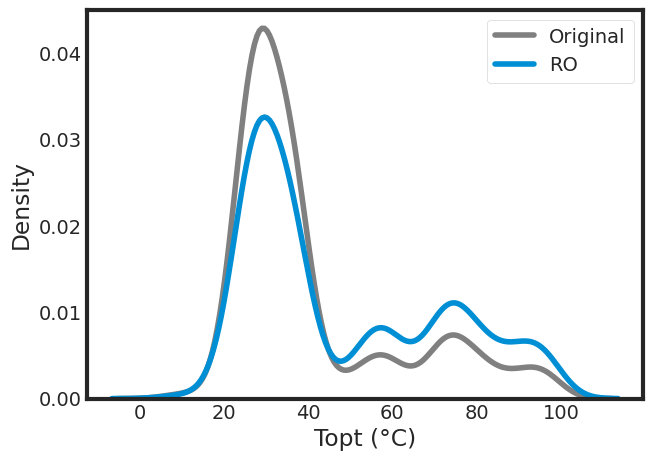

In [ ]:
##Plot y distribution 
sns.set_style("white")
sns.kdeplot(data_train_ig['seq_TEMP'], label = "Original", color="grey")
sns.kdeplot(data_train_ro['seq_TEMP'], label = "RO")
plt.legend(labels=["Original","RO"])
plt.xlabel("Topt (°C)")
plt.ylabel("Density")
#plt.title("Distribution of RO vs Original")

# **t-SNE for selected features**

T-SNE is applied to visualize the distribution of the resampled testing data into two-dimensional scale.

In [ ]:
scaler = StandardScaler()

data_train_ro_sc = scaler.fit_transform(data_train_ro.drop(['seq_TEMP'], axis=1))

embedding_ro = TSNE(n_components=2)

# transform on features
new_tsne_ro = embedding.fit_transform(data_train_ro_sc)

# reconstruct dataframe
new_tsne_ro = pd.DataFrame(new_tsne_ro, columns=[f"TSNE{i+1}" for i in range(new_tsne_ro.shape[1])])
new_tsne_ro["seq_TEMP"] = data_train_ro["seq_TEMP"]

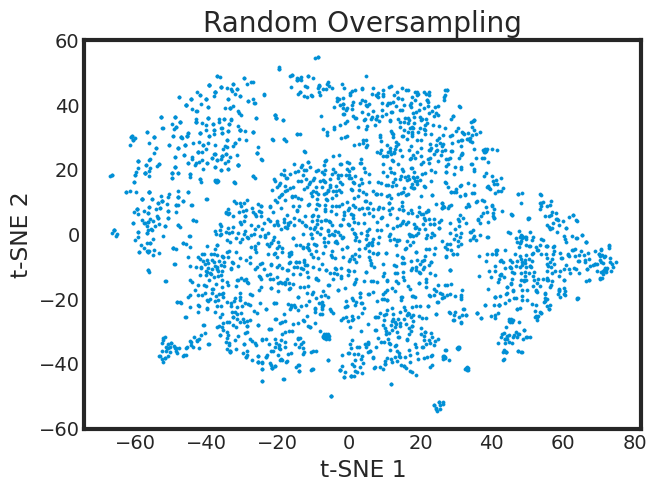

In [ ]:
#Code for displaying principal components
sns.set_style("white")
plt.scatter(new_tsne_ro.TSNE1, new_tsne_ro.TSNE2, s=5)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Random Oversampling")
plt.show()